In [2]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import scipy
from scipy.signal import find_peaks
from scipy.optimize import curve_fit
import pandas as pd
from skimage.feature import peak_local_max

all_data={}
my_array=np.zeros((250,250,400))
data03=pd.read_csv("D:Desktop/thesis/results/new_dosetomedium__clear_OB_waterphantom200MeV__1.csv",delimiter= ',',comment='#',names=['x','y','z','dose','stderror'],dtype={'x':int,'y':int,'z':int,'dose':float,'stderror':float})
for i in np.arange(2,21):
    data1=pd.read_csv("D:Desktop/thesis/results/new_dosetomedium__clear_OB_waterphantom200MeV__"+str(i)+".csv",delimiter= ',',comment='#',names=['x','y','z','dose','stderror'],dtype={'x':int,'y':int,'z':int,'dose':float,'stderror':float})
    data03.dose=data03.dose + data1.dose
data03.dose=data03.dose/(1.60218e-19)*(6.8*10**-9)/20
for i in np.arange(0,len(data03.dose)):
    my_array[data03.x[i]][data03.y[i]][data03.z[i]]=data03.dose[i]
all_data[200]=np.array(my_array)

OB= all_data[200]
OB=OB.T

In [15]:
all_data={}
my_array=np.zeros((250,250,400))
data03=pd.read_csv("D:Desktop/thesis/results/new_gammaprimary_clear_OB_waterphantom200MeV__1.csv",delimiter= ',',comment='#',names=['x','y','z','dose','stderror'],dtype={'x':int,'y':int,'z':int,'dose':float,'stderror':float})
for i in np.arange(2,21):
    data1=pd.read_csv("D:Desktop/thesis/results/new_gammaprimary_clear_OB_waterphantom200MeV__"+str(i)+".csv",delimiter= ',',comment='#',names=['x','y','z','dose','stderror'],dtype={'x':int,'y':int,'z':int,'dose':float,'stderror':float})
    data03.dose=data03.dose + data1.dose
data03.dose=data03.dose/(1.60218e-19)*(6.8*10**-9)/20
for i in np.arange(0,len(data03.dose)):
    my_array[data03.x[i]][data03.y[i]][data03.z[i]]=data03.dose[i]
all_data[200]=np.array(my_array)

OB_photon= all_data[200]
OB_photon=OB_photon.T

In [4]:
%matplotlib 


font = {'family' : 'Arial',
        'weight' : 'normal',
        'size'   : 34}

matplotlib.rc('font', **font)
matplotlib.rcParams['axes.prop_cycle'] = matplotlib.cycler(color=["#54bebe","#c80064"])



x=np.arange(0,250)*0.1
y=np.arange(0,250)*0.1
z=(np.arange(0,400)*0.25)



def gaus(x,a,x0,sigma):
    return a*np.exp(-(x-x0)**2/(2*sigma**2))

def gauss_fit(xdata,ydata):
    mean = sum(xdata * ydata) / sum(ydata)
    sigma = np.sqrt(sum(ydata * (xdata - mean)**2) / sum(ydata))
    popt,pcov = curve_fit(gaus,xdata,ydata,p0=[max(ydata), mean, sigma])
    #plt.plot(np.arange(0,len(ydata))+(124-100),gaus(xdata,*popt),label='Gaussian fit',lw=3)
    return popt[-1],np.sqrt(np.diag(pcov))[-1]
    
sigmax=[]
sigmay=[]
for i in np.arange(0,400):
    sigmax.append(gauss_fit(x[124-100:124+100],OB[i,124,124-100:124+100]))
    sigmay.append(gauss_fit(y[124-100:124+100],OB[i,124-100:124+100,124]))
sigmax=np.array(sigmax)
sigmay=np.array(sigmay)
    
filmlocs=np.arange(13,63+1,5)
figure(1,figsize=(8,8))
plt.plot(z,sigmax[:,0],label='X sigma',lw=5)
plt.plot(z,sigmay[:,0],label='Y sigma',lw=5)
plt.fill_between(z,sigmax[:,0]-sigmax[:,1],sigmax[:,0]+sigmax[:,1],alpha=0.4)
plt.fill_between(z,sigmay[:,0]-sigmay[:,1],sigmay[:,0]+sigmay[:,1],alpha=0.4)
plt.grid(c='lightgray')
plt.ylabel('Sigma (mm)')
plt.xlabel('Depth in water (mm)')

filmsigmax=np.load('D:Desktop/thesis/filmsigmax.npy')
filmsigmay=np.load('D:Desktop/thesis/filmsigmay.npy')
plt.errorbar(filmlocs,filmsigmax[:,0],yerr=filmsigmax[:,1],fmt='o',label='Film x sigma',c='#3b7a7a',markersize=12,capsize=8,capthick=2)
plt.errorbar(filmlocs,filmsigmay[:,0],yerr=filmsigmay[:,1],fmt='o', label='Film y sigma',c="#821743",markersize=12,capsize=8,capthick=2)
#l1 = plt.legend(bbox_to_anchor=(1.04, 1), borderaxespad=0)
#l2 = plt.legend(bbox_to_anchor=(1.04, 0), loc="lower left", borderaxespad=0)
#l3 = plt.legend(bbox_to_anchor=(1.04, 0.5), loc="center left", borderaxespad=0)
#l4 = plt.legend(bbox_to_anchor=(0, 1.02, 1, 0.2), loc="lower left", mode="expand", borderaxespad=0, ncol=2)

# rx=np.array([4.285,4.393,4.470,4.582,4.6,4.754,4.821,4.926,5.00,5.07])
# ry=np.array([4.544,4.614,4.674,4.782,4.807,4.93,4.986,5.081,5.154,5.225])
# plt.plot(np.arange(140,140+10*10,10),rx,label='Film sigma x',marker='o')
# plt.plot(np.arange(140,140+10*10,10),ry,label='Film sigma y',marker='o')
# plt.legend()
plt.xlim(0,100)
plt.ylim(3.5,5.5)



# print(scipy.stats.linregress(filmlocs,filmsigmax))
# print(scipy.stats.linregress(filmlocs,filmsigmay))
# print(scipy.stats.linregress(z[52:252],sigmax[52:252]))
# print(scipy.stats.linregress(z[52:252],sigmay[52:252]))

np.save('D:Desktop/thesis/sims_gauss_y1.npy',np.mean(OB[52,124-100:124+100,123:126],axis=1))
np.save('D:Desktop/thesis/sims_gauss_y2.npy',np.mean(OB[252,124-100:124+100,123:126],axis=1))
np.save('D:Desktop/thesis/sims_gauss_x1.npy',np.mean(OB[52,123:126,124-100:124+100],axis=0))
np.save('D:Desktop/thesis/sims_gauss_x2.npy',np.mean(OB[252,123:126,124-100:124+100],axis=0))

np.save('D:Desktop/thesis/sims_gauss_x3.npy',np.mean(OB[132,123:126,124-100:124+100],axis=0))
np.save('D:Desktop/thesis/sims_gauss_y3.npy',np.mean(OB[132,124-100:124+100,123:126],axis=1))


OBcax=[]
OBcax_err=[]
for k in np.arange(0,len(z)):
    OBcax.append(np.mean([OB[k,i,j] for i in np.arange(124-8,124+8) for j in np.arange(124-8,124+8)]))
    OBcax_err.append(np.std([OB[k,i,j] for i in np.arange(124-8,124+8) for j in np.arange(124-8,124+8)])/np.sqrt(len([OB[k,i,j] for i in np.arange(124-8,124+8) for j in np.arange(124-8,124+8)])))
OBcax=np.array(OBcax)
OBcax_err=np.array(OBcax_err)


obfilm=np.load('D:Desktop/thesis/200MeVOB.npy',allow_pickle=True)
figure(3,figsize=(8,8))
plt.plot(z,OBcax,lw=5,label='Simulation')
plt.fill_between(z,OBcax-OBcax_err,OBcax+OBcax_err,alpha=0.5)
plt.errorbar(obfilm[1],obfilm[2],yerr=obfilm[3],fmt='o',label='Films',markersize=12,capsize=7,capthick=2)
plt.grid(c='lightgray')
plt.xlabel('Depth in water (mm)')
plt.ylabel('CAX dose (Gy)')
plt.legend()
plt.xlim(0,100)
plt.ylim(8,16)

xsigdiff=[]
ysigdiff=[]
CAXdiff=[]
for i in np.arange(0,11):
    xsigdiff.append(np.abs((filmsigmax[i,0]-sigmax[52+i*20,0])/filmsigmax[i,0]*100))
    ysigdiff.append(np.abs((filmsigmay[i,0]-sigmay[52+i*20,0])/filmsigmay[i,0]*100))
    CAXdiff.append(np.abs((obfilm[2][i]-OBcax[52+i*20])/obfilm[2][i]*100))
    
print(xsigdiff,ysigdiff,CAXdiff)
print(np.mean(xsigdiff),np.mean(ysigdiff),np.mean(CAXdiff))

figure(17)
plt.imshow(OB[52])

print(sigmax[0],sigmax[100])
print(sigmay[0],sigmay[100])

Using matplotlib backend: QtAgg
[1.1616380949264031, 0.3141033876091782, 0.36936935257909, 0.19096718880229155, 1.006446978427203, 0.1700982389351327, 0.735247695599243, 0.24628981351930715, 0.2723641969033547, 0.6376619360846957, 0.9981617897023666] [0.22447546155673462, 1.1268878312845636, 0.35055887255434753, 0.8219628247542342, 0.13946934392116492, 0.09733829891488288, 0.27410632088599957, 0.03937323189623816, 0.23120325669715094, 0.19550166710648803, 0.8523401526752048] [5.073830130399007, 6.039502817300154, 4.247517399198012, 4.393425315711671, 5.655316771876519, 1.6171970360964765, 1.4630220238718565, 1.5238420067381853, 1.7644153126507602, 1.2830251246851068, 2.4896895236216183]
0.5547589702807514 0.39574702384063715 3.2318894056499428
[3.67241128 0.01239958] [3.924614 0.015601]
[3.85608034 0.01460387] [4.11983831 0.01632857]


In [11]:
%matplotlib inline


font = {'family' : 'Arial',
        'weight' : 'normal',
        'size'   : 34}

matplotlib.rc('font', **font)
matplotlib.rcParams['axes.prop_cycle'] = matplotlib.cycler(color=["#54bebe","#c80064"])



x=np.arange(0,250)*0.1
y=np.arange(0,250)*0.1
z=(np.arange(0,400)*0.25)





OB_photoncax=[]
OB_photoncax_err=[]
for k in np.arange(0,len(z)):
    OB_photoncax.append(np.mean([OB_photon[k,i,j] for i in np.arange(124-8,124+8) for j in np.arange(124-8,124+8)]))
    OB_photoncax_err.append(np.std([OB_photon[k,i,j] for i in np.arange(124-8,124+8) for j in np.arange(124-8,124+8)])/np.sqrt(len([OB_photon[k,i,j] for i in np.arange(124-8,124+8) for j in np.arange(124-8,124+8)])))
OB_photoncax=np.array(OB_photoncax)
OB_photoncax_err=np.array(OB_photoncax_err)




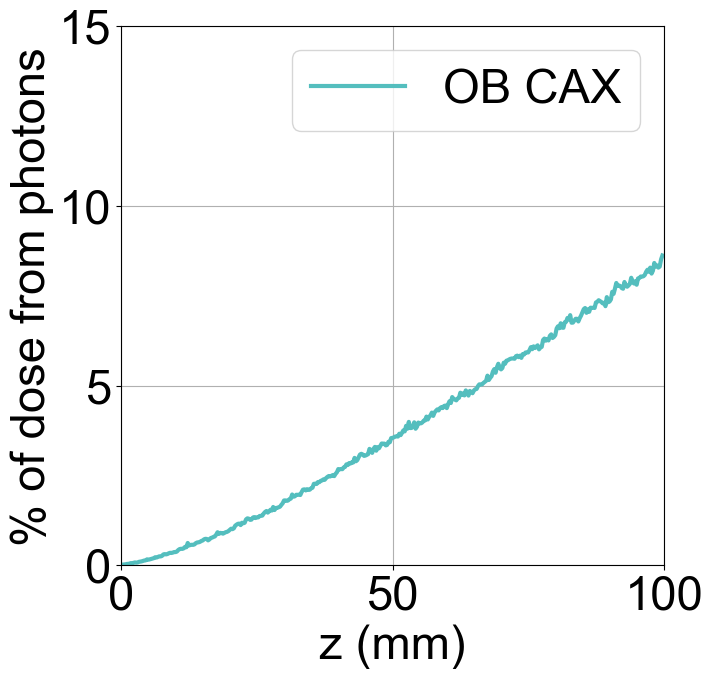

In [13]:
figure(1,figsize=(7,7))
plt.plot(z,OB_photoncax/OBcax*100,lw=3,label='OB CAX')

plt.grid()
plt.ylim(0,15)
plt.xlim(0,100)
plt.xlabel('z (mm)')
plt.ylabel('% of dose from photons')
plt.legend()

# print(np.mean(photon_peaks[52:252]/peaks[52:252])*100)
# print(np.mean(photon_valleys[52:252]/valleys[52:252])*100)
# print(51/28)